## Read titanic dataset

In [62]:
import pandas as pd
titanic=pd.read_csv("Titanic.csv")

## convert sex into numbers

In [63]:
titanic.loc[titanic['sex']=='male','sex'] = 0
titanic.loc[titanic['sex']=='female','sex'] = 1
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",0,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",1,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## seperate independent and variables

In [64]:
X=titanic[['pclass','sex','age','sibsp']]
Y=titanic['survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
pclass    1309 non-null object
sex       1309 non-null object
age       1046 non-null float64
sibsp     1309 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.0+ KB


## Use 0 to fill NA values of Age attribute

In [65]:
X['age'] = X['age'].fillna(0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
pclass    1309 non-null object
sex       1309 non-null object
age       1309 non-null float64
sibsp     1309 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.0+ KB


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## split training and test dataset

In [66]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)

X_train = vec.fit_transform(X_train.to_dict(orient='record'))
print(vec.feature_names_)
X_test = vec.fit_transform(X_test.to_dict(orient='record'))

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex', 'sibsp']


## use MLPClassifier function to fit neural network

In [67]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=0.1, max_iter=5000, hidden_layer_sizes=2, random_state=16)
clf.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=16, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [68]:
clf.score(X_train, Y_train) 

0.80131004366812231

In [69]:
clf.predict(X_train)

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1,

In [70]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0,

In [71]:
Predict_Y_train = clf.predict(X_train)
Predict_Y_test = clf.predict(X_test)

## get the accuracy of Neural Network

In [72]:
from sklearn.metrics import accuracy_score
clf = MLPClassifier(solver='adam', alpha=0.1, max_iter=5000, hidden_layer_sizes=2, random_state=16)
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train) 
clf.predict(X_train)
clf.predict(X_test)
Predict_Y_train = clf.predict(X_train)
Predict_Y_test = clf.predict(X_test)
accs0 = accuracy_score(Y_train, Predict_Y_train)
cm0 = confusion_matrix(Y_train, Predict_Y_train)
accs = accuracy_score(Y_test, Predict_Y_test)
cm = confusion_matrix(Y_test, Predict_Y_test)
print("The in-sample survivor accuracy is:%",100*cm0[1][1]/(cm0[1][1]+cm0[1][0]))
print("The in-sample fatalities accuracy is:%",100*cm0[0][0]/(cm0[0][0]+cm0[0][1]))
print("The out-sample survivor accuracy is:%",100*cm[1][1]/(cm[1][1]+cm[1][0]))
print("The out-sample fatalities accuracy is:%",100*cm[0][0]/(cm[0][0]+cm[0][1]))

The in-sample survivor accuracy is:% 66.2889518414
The in-sample fatalities accuracy is:% 88.809946714
The out-sample survivor accuracy is:% 61.9047619048
The out-sample fatalities accuracy is:% 89.837398374


In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
accs0 = accuracy_score(Y_train, Predict_Y_train)
cm0 = confusion_matrix(Y_train, Predict_Y_train)
accs = accuracy_score(Y_test, Predict_Y_test)
cm = confusion_matrix(Y_test, Predict_Y_test)

In [74]:
print(str(accs0*100)+'%')
print(str(cm0))
print(str(accs*100)+'%')
print(str(cm))

80.1310043668%
[[500  63]
 [119 234]]
79.3893129771%
[[221  25]
 [ 56  91]]


In [75]:
print("The in-sample survivor accuracy is:%",100*cm0[1][1]/(cm0[1][1]+cm0[1][0]))
print("The in-sample fatalities accuracy is:%",100*cm0[0][0]/(cm0[0][0]+cm0[0][1]))
print("The out-sample survivor accuracy is:%",100*cm[1][1]/(cm[1][1]+cm[1][0]))
print("The out-sample fatalities accuracy is:%",100*cm[0][0]/(cm[0][0]+cm[0][1]))

The in-sample survivor accuracy is:% 66.2889518414
The in-sample fatalities accuracy is:% 88.809946714
The out-sample survivor accuracy is:% 61.9047619048
The out-sample fatalities accuracy is:% 89.837398374


## Get the accuracy of another neural network when hidden layer is different in the same way

In [76]:
clf_test = MLPClassifier(solver='adam', alpha=0.1, max_iter=5000, hidden_layer_sizes=3, random_state=16)
clf_test.fit(X_train, Y_train)
clf_test.score(X_train, Y_train) 
clf_test.predict(X_train)
clf_test.predict(X_test)
Predict_Y_train_test = clf_test.predict(X_train)
Predict_Y_test_test = clf_test.predict(X_test)
accs1 = accuracy_score(Y_train, Predict_Y_train_test)
cm1 = confusion_matrix(Y_train, Predict_Y_train_test)
accs2 = accuracy_score(Y_test, Predict_Y_test_test)
cm2 = confusion_matrix(Y_test, Predict_Y_test_test)
print("The in-sample survivor accuracy is:%",100*cm1[1][1]/(cm1[1][1]+cm1[1][0]))
print("The in-sample fatalities accuracy is:%",100*cm1[0][0]/(cm1[0][0]+cm1[0][1]))
print("The out-sample survivor accuracy is:%",100*cm2[1][1]/(cm2[1][1]+cm2[1][0]))
print("The out-sample fatalities accuracy is:%",100*cm2[0][0]/(cm2[0][0]+cm2[0][1]))

The in-sample survivor accuracy is:% 67.1388101983
The in-sample fatalities accuracy is:% 86.8561278863
The out-sample survivor accuracy is:% 64.6258503401
The out-sample fatalities accuracy is:% 87.8048780488


## fit the decision tree model

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,Y_train)
dtc.score(X_test, Y_test)
Y_predict = dtc.predict(X_test)
from sklearn import metrics
predict_train=dtc.predict(X_train)
result_train=metrics.confusion_matrix(Y_train,predict_train)
predict_test=dtc.predict(X_test)
result_test=metrics.confusion_matrix(Y_test,predict_test)
print("The in-sample survivor accuracy is:%",100*result_train[1][1]/(result_train[1][1]+result_train[1][0]))
print("The in-sample victim accuracy is:%",100*result_train[0][0]/(result_train[0][0]+result_train[0][1]))
print("The out-sample survivor accuracy is:%",100*result_test[1][1]/(result_test[1][1]+result_test[1][0]))
print("The out-sample victim accuracy is:%",100*result_test[0][0]/(result_test[0][0]+result_test[0][1]))

The in-sample survivor accuracy is:% 77.3371104816
The in-sample victim accuracy is:% 96.0923623446
The out-sample survivor accuracy is:% 55.7823129252
The out-sample victim accuracy is:% 86.9918699187


## plot the bar graph to compare accuracy

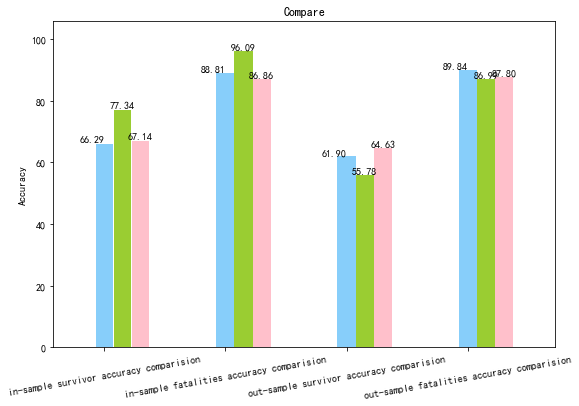

In [78]:
from matplotlib import pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(9,6))
n = 4
X = np.arange(n)+1
Y1 = [66.2889518414, 88.809946714, 61.9047619048, 89.837398374]
Y2 = [77.3371104816,96.0923623446,55.7823129252,86.9918699187]
Y3 = [67.1388101983,86.8561278863,64.6258503401,87.8048780488]
plt.bar(X,Y1,width = 0.15,facecolor = 'lightskyblue',edgecolor = 'white',label = 'Neural Network')
plt.bar(X+0.15,Y2,width = 0.15,facecolor = 'yellowgreen',edgecolor = 'white',label = 'Decision Tree')
plt.bar(X+0.3,Y3,width = 0.15,facecolor = 'pink',edgecolor = 'white',label = 'Neural Network(hidden layer is 3)')
for x,y in zip(X,Y1):
    plt.text(x-0.1, y, '%.2f' % y, ha='center', va= 'bottom',label = 'Neural Network')
for x,y in zip(X,Y2):
    plt.text(x+0.15, y+0.001, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y3):
    plt.text(x+0.3, y+0.002, '%.2f' % y, ha='center', va= 'bottom')

names = ['','in-sample survivor accuracy comparision', 'in-sample fatalities accuracy comparision', 'out-sample survivor accuracy comparision', 'out-sample fatalities accuracy comparision']
x = range(len(names))
plt.xticks(x, names, rotation=10)
plt.margins(0.1)
plt.ylabel("Accuracy")
plt.title("Compare")
plt.show()

### As you can see in the bar graph,I plot the comparision of neural network with 2 hidden layers,decision tree and neural network with 3 hidden layers.The color of each is blue,green and pink.The accuracy data of decision tree from the HW3_part2.As it shows in the graph,you can see that the accuracy of decision tree model of in-sample is higher than other two.But for the out-sample,the accuracy of neural network is higher than decision tree